<a href="https://colab.research.google.com/github/mgskko/Data_science_Study-hongongmachine/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_9%EA%B0%95_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSTM 신경망 훈련하기

In [1]:

from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)


17473536/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [4]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 24s 68ms/step - loss: 0.6927 - accuracy: 0.5306 - val_loss: 0.6921 - val_accuracy: 0.6020
Epoch 2/100
313/313 [==============================] - 18s 58ms/step - loss: 0.6910 - accuracy: 0.6090 - val_loss: 0.6894 - val_accuracy: 0.6418
Epoch 3/100
313/313 [==============================] - 19s 61ms/step - loss: 0.6854 - accuracy: 0.6557 - val_loss: 0.6799 - val_accuracy: 0.6678
Epoch 4/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6591 - accuracy: 0.6964 - val_loss: 0.6326 - val_accuracy: 0.7210
Epoch 5/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6115 - accuracy: 0.7232 - val_loss: 0.6064 - val_accuracy: 0.7158
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5887 - accuracy: 0.7323 - val_loss: 0.5877 - val_accuracy: 0.7226
Epoch 7/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5684 - accuracy: 0.7466 - val_loss: 0.5678 - val_ac

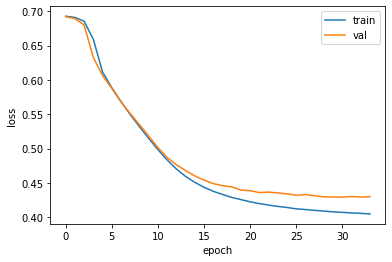

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

순환 층에 드롭아웃 적용하기

In [6]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [7]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 44ms/step - loss: 0.6924 - accuracy: 0.5433 - val_loss: 0.6913 - val_accuracy: 0.6108
Epoch 2/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6888 - accuracy: 0.6261 - val_loss: 0.6835 - val_accuracy: 0.6358
Epoch 3/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6620 - accuracy: 0.6391 - val_loss: 0.6307 - val_accuracy: 0.7004
Epoch 4/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6195 - accuracy: 0.7165 - val_loss: 0.6037 - val_accuracy: 0.7268
Epoch 5/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6004 - accuracy: 0.7262 - val_loss: 0.5874 - val_accuracy: 0.7428
Epoch 6/100
313/313 [==============================] - 13s 43ms/step - loss: 0.5823 - accuracy: 0.7363 - val_loss: 0.5714 - val_accuracy: 0.7510
Epoch 7/100
313/313 [==============================] - 14s 46ms/step - loss: 0.5656 - accuracy: 0.7454 - val_loss: 0.5549 - val_ac

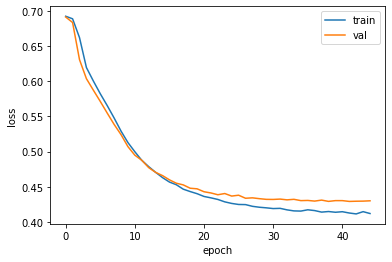

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


2개의 층을 연결하기

In [9]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [10]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 32s 88ms/step - loss: 0.6921 - accuracy: 0.5537 - val_loss: 0.6912 - val_accuracy: 0.5518
Epoch 2/100
313/313 [==============================] - 26s 82ms/step - loss: 0.6867 - accuracy: 0.6083 - val_loss: 0.6799 - val_accuracy: 0.6602
Epoch 3/100
313/313 [==============================] - 26s 82ms/step - loss: 0.6538 - accuracy: 0.6743 - val_loss: 0.6151 - val_accuracy: 0.6924
Epoch 4/100
313/313 [==============================] - 26s 82ms/step - loss: 0.5782 - accuracy: 0.7171 - val_loss: 0.5612 - val_accuracy: 0.7256
Epoch 5/100
313/313 [==============================] - 26s 82ms/step - loss: 0.5466 - accuracy: 0.7346 - val_loss: 0.5361 - val_accuracy: 0.7424
Epoch 6/100
313/313 [==============================] - 27s 86ms/step - loss: 0.5268 - accuracy: 0.7514 - val_loss: 0.5229 - val_accuracy: 0.7508
Epoch 7/100
313/313 [==============================] - 26s 83ms/step - loss: 0.5114 - accuracy: 0.7603 - val_loss: 0.5061 - val_ac

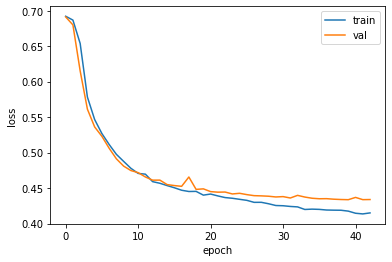

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


GRU 신경망 훈련하기

In [ ]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 47ms/step - loss: 0.6921 - accuracy: 0.5321 - val_loss: 0.6909 - val_accuracy: 0.5540
Epoch 2/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6893 - accuracy: 0.5746 - val_loss: 0.6880 - val_accuracy: 0.5802
Epoch 3/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6850 - accuracy: 0.5994 - val_loss: 0.6829 - val_accuracy: 0.5950
Epoch 4/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6778 - accuracy: 0.6201 - val_loss: 0.6745 - val_accuracy: 0.6144
Epoch 5/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6658 - accuracy: 0.6357 - val_loss: 0.6611 - val_accuracy: 0.6332
Epoch 6/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6461 - accuracy: 0.6576 - val_loss: 0.6365 - val_accuracy: 0.6600
Epoch 7/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6051 - accuracy: 0.6849 - val_loss: 0.5844 - val_ac

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [15]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 12s 14ms/step - loss: 0.4264 - accuracy: 0.8010


[0.42641255259513855, 0.8009600043296814]